In [59]:
import numpy as np
import keras
from keras.preprocessing import image as img

In [60]:
PATH_BASE = "."
DEV = (0xbb - 0x39) / (0xc5 - 0x39)

In [61]:
rawimg = img.load_img("%s/Windows.jpeg" % PATH_BASE)
rawarr = img.img_to_array(rawimg)

In [62]:
def transcolor(rawcolor):
    elemax = rawcolor.max()
    elemin = rawcolor.min()
    elemid = (1 - DEV) * elemin + DEV * elemax
    return np.array([ elemin, elemax, elemid ])

In [63]:
newarr = np.zeros(rawarr.shape)
for k in range(rawarr.shape[0]):
    for l in range(rawarr.shape[1]):
        newarr[k, l] += transcolor(transcolor(rawarr[k, l]))
newimg = img.array_to_img(newarr)

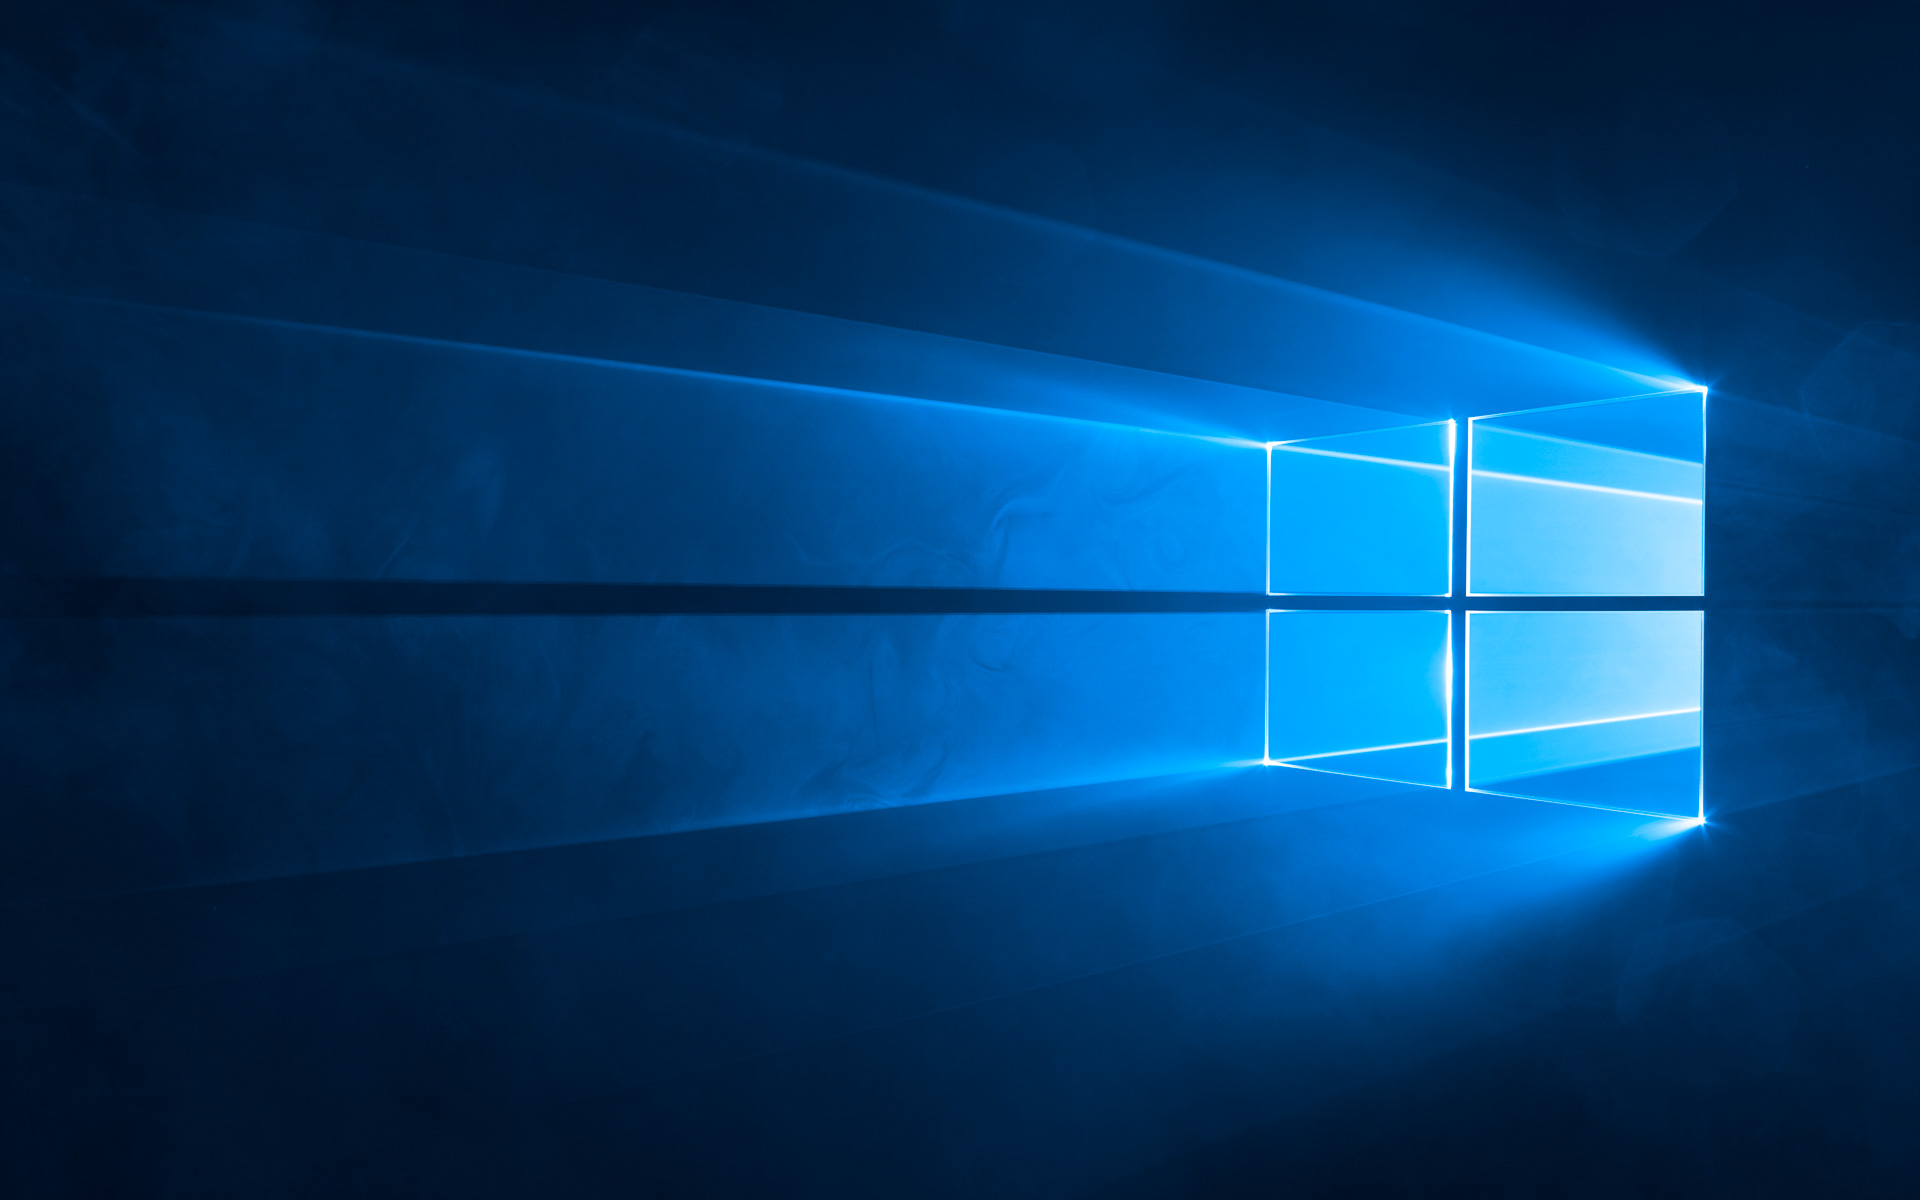

In [64]:
rawimg

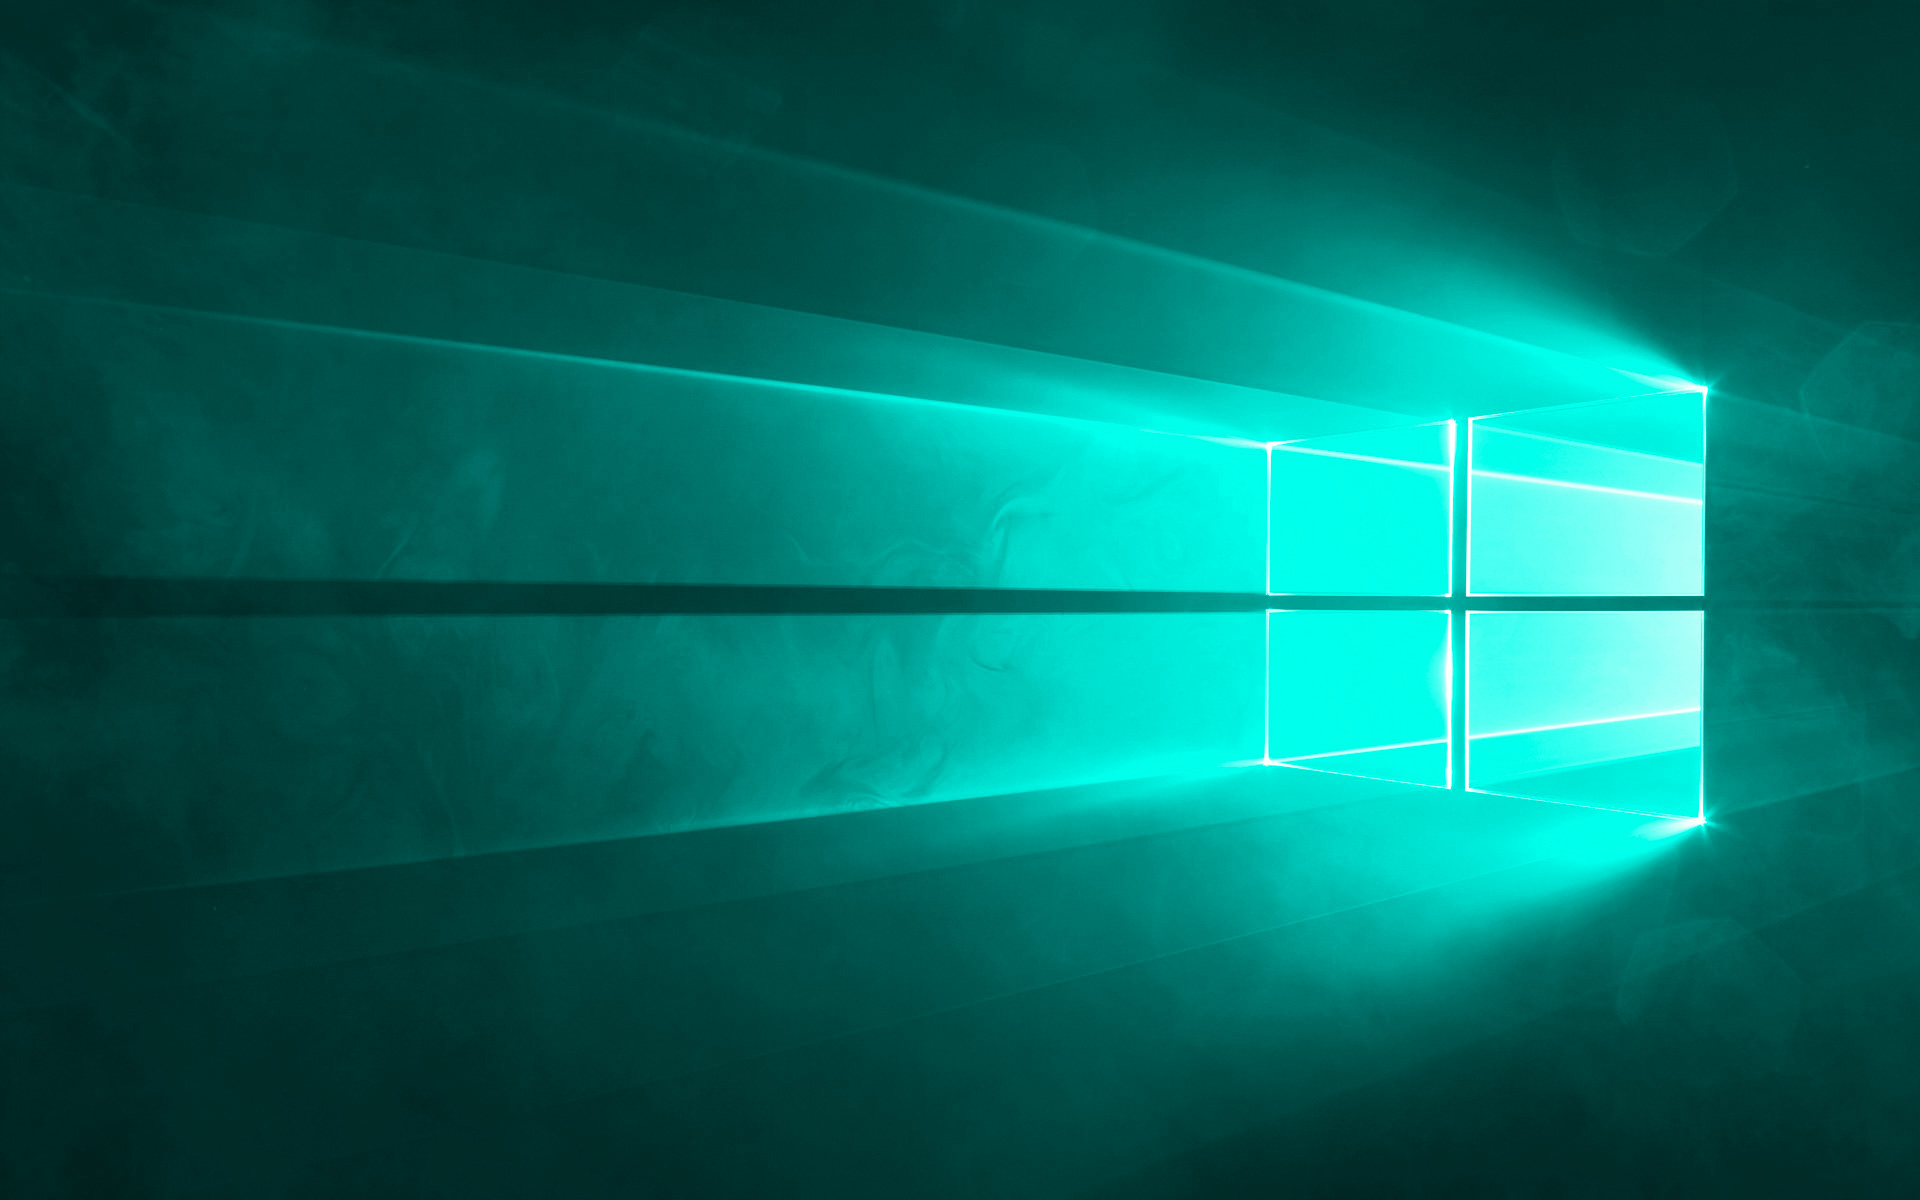

In [65]:
newimg

In [66]:
newimg.save("%s/Winmiku.jpeg" % PATH_BASE)

In [55]:
# For Generating Square Avatars
sidelen = np.max(rawarr.shape)
largerarr = np.ones((sidelen, sidelen, 3)) * 255
largerarr[
    sidelen // 2 - rawarr.shape[0] // 2 : sidelen // 2 + rawarr.shape[0] // 2 ,
    sidelen // 2 - rawarr.shape[1] // 2 : sidelen // 2 + rawarr.shape[1] // 2 ,
    :
    ] = newarr.copy()
largerimg = img.array_to_img(largerarr)